In [229]:
'''
run to install required packages\liraries
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install yfinance
!pip install prophet
'''

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime, timedelta
import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import itertools
from prophet.diagnostics import cross_validation

In [230]:
def get_rmse(pred, tar):
    return np.sqrt(mean_squared_error(pred, tar))

def get_mape(pred, tar):
    return mean_absolute_percentage_error(pred, tar)

def get_mae(pred, tar):
    return mean_absolute_error(pred, tar)
    
#calculating error metrics to then comapre and find best optimal parameters
def get_metrics(df, split, H, forecast):
    metrics = []
    targets = forecast.iloc[0]
    preds = forecast.iloc[1]#split : split+H
    metrics.append(get_rmse(targets, preds))
    metrics.append(get_mape(targets, preds))
    metrics.append(get_mae(targets, preds))
    return metrics
    
def run_model(df, split, H, cps, fo):
    
    md = Prophet(changepoint_prior_scale=cps, weekly_seasonality=False)
    md.add_seasonality(name='monthly', period=H, fourier_order=fo)
    md.fit(df[:split])
    '''
    model will be trained on 756 days,
    then predict for the remaining days with forecast horizon of 21 days,
    shifting the predictions by 42 days after each prediction
    '''
    df_cv = cross_validation(md, initial='756 days', period='42 days', horizon = '21 days')
    tmp = df_cv.iloc[:, [1, 4]]
    return tmp
    
#hyperparametrs tuning
def tune(df, split, H, params):
    to_compare = []
    for i, j in params:
        cps = i[1]
        fo = j[1]
        curr_params = [cps, fo]
        forecasted = run_model(df, split, H, cps, fo)
        rmse_mape_mae = get_metrics(df, split, H, forecasted)
        to_compare.append(curr_params + rmse_mape_mae)
    return to_compare

In [231]:
#data download
data = yf.download(tickers = 'ATVI', start = '2018-07-29',end = '2023-07-29') #1459 days overall, 5 yrs
#preprocessing
data.drop(['Volume', 'High', 'Low', 'Open', 'Adj Close'], axis=1, inplace=True)
data.dropna(inplace=True)
df = pd.DataFrame()
df["y"] = data["Close"]
df["ds"] = data.index

train = 252*3 #252 trade days in a year 
val = 252
split = train + val #4 trading yrs
H = 21

params = {
        'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3],
        'fourier_order': [2, 4, 6, 8, 9, 10]
    }
all_params = [zip(params.keys(), v) for v in itertools.product(*params.values())]
results = tune(df, split, H, all_params)

[*********************100%***********************]  1 of 1 completed


21:48:44 - cmdstanpy - INFO - Chain [1] start processing
21:48:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/17 [00:00<?, ?it/s]

21:48:44 - cmdstanpy - INFO - Chain [1] start processing
21:48:44 - cmdstanpy - INFO - Chain [1] done processing
21:48:45 - cmdstanpy - INFO - Chain [1] start processing
21:48:45 - cmdstanpy - INFO - Chain [1] done processing
21:48:45 - cmdstanpy - INFO - Chain [1] start processing
21:48:45 - cmdstanpy - INFO - Chain [1] done processing
21:48:45 - cmdstanpy - INFO - Chain [1] start processing
21:48:45 - cmdstanpy - INFO - Chain [1] done processing
21:48:46 - cmdstanpy - INFO - Chain [1] start processing
21:48:46 - cmdstanpy - INFO - Chain [1] done processing
21:48:46 - cmdstanpy - INFO - Chain [1] start processing
21:48:46 - cmdstanpy - INFO - Chain [1] done processing
21:48:46 - cmdstanpy - INFO - Chain [1] start processing
21:48:47 - cmdstanpy - INFO - Chain [1] done processing
21:48:47 - cmdstanpy - INFO - Chain [1] start processing
21:48:47 - cmdstanpy - INFO - Chain [1] done processing
21:48:47 - cmdstanpy - INFO - Chain [1] start processing
21:48:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:48:51 - cmdstanpy - INFO - Chain [1] start processing
21:48:51 - cmdstanpy - INFO - Chain [1] done processing
21:48:52 - cmdstanpy - INFO - Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing
21:48:52 - cmdstanpy - INFO - Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing
21:48:52 - cmdstanpy - INFO - Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing
21:48:53 - cmdstanpy - INFO - Chain [1] start processing
21:48:53 - cmdstanpy - INFO - Chain [1] done processing
21:48:53 - cmdstanpy - INFO - Chain [1] start processing
21:48:53 - cmdstanpy - INFO - Chain [1] done processing
21:48:53 - cmdstanpy - INFO - Chain [1] start processing
21:48:53 - cmdstanpy - INFO - Chain [1] done processing
21:48:54 - cmdstanpy - INFO - Chain [1] start processing
21:48:54 - cmdstanpy - INFO - Chain [1] done processing
21:48:54 - cmdstanpy - INFO - Chain [1] start processing
21:48:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:48:58 - cmdstanpy - INFO - Chain [1] start processing
21:48:58 - cmdstanpy - INFO - Chain [1] done processing
21:48:58 - cmdstanpy - INFO - Chain [1] start processing
21:48:58 - cmdstanpy - INFO - Chain [1] done processing
21:48:59 - cmdstanpy - INFO - Chain [1] start processing
21:48:59 - cmdstanpy - INFO - Chain [1] done processing
21:48:59 - cmdstanpy - INFO - Chain [1] start processing
21:48:59 - cmdstanpy - INFO - Chain [1] done processing
21:48:59 - cmdstanpy - INFO - Chain [1] start processing
21:49:00 - cmdstanpy - INFO - Chain [1] done processing
21:49:00 - cmdstanpy - INFO - Chain [1] start processing
21:49:00 - cmdstanpy - INFO - Chain [1] done processing
21:49:00 - cmdstanpy - INFO - Chain [1] start processing
21:49:00 - cmdstanpy - INFO - Chain [1] done processing
21:49:01 - cmdstanpy - INFO - Chain [1] start processing
21:49:01 - cmdstanpy - INFO - Chain [1] done processing
21:49:01 - cmdstanpy - INFO - Chain [1] start processing
21:49:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:05 - cmdstanpy - INFO - Chain [1] done processing
21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing
21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing
21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing
21:49:07 - cmdstanpy - INFO - Chain [1] start processing
21:49:07 - cmdstanpy - INFO - Chain [1] done processing
21:49:07 - cmdstanpy - INFO - Chain [1] start processing
21:49:07 - cmdstanpy - INFO - Chain [1] done processing
21:49:07 - cmdstanpy - INFO - Chain [1] start processing
21:49:08 - cmdstanpy - INFO - Chain [1] done processing
21:49:08 - cmdstanpy - INFO - Chain [1] start processing
21:49:08 - cmdstanpy - INFO - Chain [1] done processing
21:49:08 - cmdstanpy - INFO - Chain [1] start processing
21:49:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:12 - cmdstanpy - INFO - Chain [1] start processing
21:49:12 - cmdstanpy - INFO - Chain [1] done processing
21:49:13 - cmdstanpy - INFO - Chain [1] start processing
21:49:13 - cmdstanpy - INFO - Chain [1] done processing
21:49:13 - cmdstanpy - INFO - Chain [1] start processing
21:49:13 - cmdstanpy - INFO - Chain [1] done processing
21:49:13 - cmdstanpy - INFO - Chain [1] start processing
21:49:14 - cmdstanpy - INFO - Chain [1] done processing
21:49:14 - cmdstanpy - INFO - Chain [1] start processing
21:49:14 - cmdstanpy - INFO - Chain [1] done processing
21:49:14 - cmdstanpy - INFO - Chain [1] start processing
21:49:14 - cmdstanpy - INFO - Chain [1] done processing
21:49:15 - cmdstanpy - INFO - Chain [1] start processing
21:49:15 - cmdstanpy - INFO - Chain [1] done processing
21:49:15 - cmdstanpy - INFO - Chain [1] start processing
21:49:15 - cmdstanpy - INFO - Chain [1] done processing
21:49:15 - cmdstanpy - INFO - Chain [1] start processing
21:49:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:20 - cmdstanpy - INFO - Chain [1] start processing
21:49:20 - cmdstanpy - INFO - Chain [1] done processing
21:49:20 - cmdstanpy - INFO - Chain [1] start processing
21:49:20 - cmdstanpy - INFO - Chain [1] done processing
21:49:20 - cmdstanpy - INFO - Chain [1] start processing
21:49:20 - cmdstanpy - INFO - Chain [1] done processing
21:49:21 - cmdstanpy - INFO - Chain [1] start processing
21:49:21 - cmdstanpy - INFO - Chain [1] done processing
21:49:21 - cmdstanpy - INFO - Chain [1] start processing
21:49:21 - cmdstanpy - INFO - Chain [1] done processing
21:49:21 - cmdstanpy - INFO - Chain [1] start processing
21:49:21 - cmdstanpy - INFO - Chain [1] done processing
21:49:22 - cmdstanpy - INFO - Chain [1] start processing
21:49:22 - cmdstanpy - INFO - Chain [1] done processing
21:49:22 - cmdstanpy - INFO - Chain [1] start processing
21:49:22 - cmdstanpy - INFO - Chain [1] done processing
21:49:22 - cmdstanpy - INFO - Chain [1] start processing
21:49:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:27 - cmdstanpy - INFO - Chain [1] start processing
21:49:27 - cmdstanpy - INFO - Chain [1] done processing
21:49:27 - cmdstanpy - INFO - Chain [1] start processing
21:49:27 - cmdstanpy - INFO - Chain [1] done processing
21:49:28 - cmdstanpy - INFO - Chain [1] start processing
21:49:28 - cmdstanpy - INFO - Chain [1] done processing
21:49:28 - cmdstanpy - INFO - Chain [1] start processing
21:49:28 - cmdstanpy - INFO - Chain [1] done processing
21:49:28 - cmdstanpy - INFO - Chain [1] start processing
21:49:29 - cmdstanpy - INFO - Chain [1] done processing
21:49:29 - cmdstanpy - INFO - Chain [1] start processing
21:49:29 - cmdstanpy - INFO - Chain [1] done processing
21:49:29 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1] done processing
21:49:30 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1] done processing
21:49:30 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:35 - cmdstanpy - INFO - Chain [1] start processing
21:49:35 - cmdstanpy - INFO - Chain [1] done processing
21:49:36 - cmdstanpy - INFO - Chain [1] start processing
21:49:36 - cmdstanpy - INFO - Chain [1] done processing
21:49:36 - cmdstanpy - INFO - Chain [1] start processing
21:49:36 - cmdstanpy - INFO - Chain [1] done processing
21:49:37 - cmdstanpy - INFO - Chain [1] start processing
21:49:37 - cmdstanpy - INFO - Chain [1] done processing
21:49:37 - cmdstanpy - INFO - Chain [1] start processing
21:49:37 - cmdstanpy - INFO - Chain [1] done processing
21:49:37 - cmdstanpy - INFO - Chain [1] start processing
21:49:38 - cmdstanpy - INFO - Chain [1] done processing
21:49:38 - cmdstanpy - INFO - Chain [1] start processing
21:49:38 - cmdstanpy - INFO - Chain [1] done processing
21:49:38 - cmdstanpy - INFO - Chain [1] start processing
21:49:39 - cmdstanpy - INFO - Chain [1] done processing
21:49:39 - cmdstanpy - INFO - Chain [1] start processing
21:49:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:44 - cmdstanpy - INFO - Chain [1] start processing
21:49:44 - cmdstanpy - INFO - Chain [1] done processing
21:49:44 - cmdstanpy - INFO - Chain [1] start processing
21:49:44 - cmdstanpy - INFO - Chain [1] done processing
21:49:45 - cmdstanpy - INFO - Chain [1] start processing
21:49:45 - cmdstanpy - INFO - Chain [1] done processing
21:49:45 - cmdstanpy - INFO - Chain [1] start processing
21:49:45 - cmdstanpy - INFO - Chain [1] done processing
21:49:46 - cmdstanpy - INFO - Chain [1] start processing
21:49:46 - cmdstanpy - INFO - Chain [1] done processing
21:49:46 - cmdstanpy - INFO - Chain [1] start processing
21:49:46 - cmdstanpy - INFO - Chain [1] done processing
21:49:47 - cmdstanpy - INFO - Chain [1] start processing
21:49:47 - cmdstanpy - INFO - Chain [1] done processing
21:49:47 - cmdstanpy - INFO - Chain [1] start processing
21:49:47 - cmdstanpy - INFO - Chain [1] done processing
21:49:48 - cmdstanpy - INFO - Chain [1] start processing
21:49:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:49:53 - cmdstanpy - INFO - Chain [1] start processing
21:49:53 - cmdstanpy - INFO - Chain [1] done processing
21:49:53 - cmdstanpy - INFO - Chain [1] start processing
21:49:53 - cmdstanpy - INFO - Chain [1] done processing
21:49:54 - cmdstanpy - INFO - Chain [1] start processing
21:49:54 - cmdstanpy - INFO - Chain [1] done processing
21:49:54 - cmdstanpy - INFO - Chain [1] start processing
21:49:54 - cmdstanpy - INFO - Chain [1] done processing
21:49:54 - cmdstanpy - INFO - Chain [1] start processing
21:49:55 - cmdstanpy - INFO - Chain [1] done processing
21:49:55 - cmdstanpy - INFO - Chain [1] start processing
21:49:55 - cmdstanpy - INFO - Chain [1] done processing
21:49:55 - cmdstanpy - INFO - Chain [1] start processing
21:49:56 - cmdstanpy - INFO - Chain [1] done processing
21:49:56 - cmdstanpy - INFO - Chain [1] start processing
21:49:56 - cmdstanpy - INFO - Chain [1] done processing
21:49:56 - cmdstanpy - INFO - Chain [1] start processing
21:49:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:50:02 - cmdstanpy - INFO - Chain [1] start processing
21:50:02 - cmdstanpy - INFO - Chain [1] done processing
21:50:02 - cmdstanpy - INFO - Chain [1] start processing
21:50:03 - cmdstanpy - INFO - Chain [1] done processing
21:50:03 - cmdstanpy - INFO - Chain [1] start processing
21:50:03 - cmdstanpy - INFO - Chain [1] done processing
21:50:03 - cmdstanpy - INFO - Chain [1] start processing
21:50:03 - cmdstanpy - INFO - Chain [1] done processing
21:50:04 - cmdstanpy - INFO - Chain [1] start processing
21:50:04 - cmdstanpy - INFO - Chain [1] done processing
21:50:04 - cmdstanpy - INFO - Chain [1] start processing
21:50:04 - cmdstanpy - INFO - Chain [1] done processing
21:50:05 - cmdstanpy - INFO - Chain [1] start processing
21:50:05 - cmdstanpy - INFO - Chain [1] done processing
21:50:05 - cmdstanpy - INFO - Chain [1] start processing
21:50:06 - cmdstanpy - INFO - Chain [1] done processing
21:50:06 - cmdstanpy - INFO - Chain [1] start processing
21:50:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:50:11 - cmdstanpy - INFO - Chain [1] start processing
21:50:11 - cmdstanpy - INFO - Chain [1] done processing
21:50:11 - cmdstanpy - INFO - Chain [1] start processing
21:50:12 - cmdstanpy - INFO - Chain [1] done processing
21:50:12 - cmdstanpy - INFO - Chain [1] start processing
21:50:12 - cmdstanpy - INFO - Chain [1] done processing
21:50:12 - cmdstanpy - INFO - Chain [1] start processing
21:50:13 - cmdstanpy - INFO - Chain [1] done processing
21:50:13 - cmdstanpy - INFO - Chain [1] start processing
21:50:13 - cmdstanpy - INFO - Chain [1] done processing
21:50:13 - cmdstanpy - INFO - Chain [1] start processing
21:50:13 - cmdstanpy - INFO - Chain [1] done processing
21:50:14 - cmdstanpy - INFO - Chain [1] start processing
21:50:14 - cmdstanpy - INFO - Chain [1] done processing
21:50:14 - cmdstanpy - INFO - Chain [1] start processing
21:50:14 - cmdstanpy - INFO - Chain [1] done processing
21:50:15 - cmdstanpy - INFO - Chain [1] start processing
21:50:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:50:20 - cmdstanpy - INFO - Chain [1] start processing
21:50:20 - cmdstanpy - INFO - Chain [1] done processing
21:50:21 - cmdstanpy - INFO - Chain [1] start processing
21:50:21 - cmdstanpy - INFO - Chain [1] done processing
21:50:21 - cmdstanpy - INFO - Chain [1] start processing
21:50:21 - cmdstanpy - INFO - Chain [1] done processing
21:50:22 - cmdstanpy - INFO - Chain [1] start processing
21:50:22 - cmdstanpy - INFO - Chain [1] done processing
21:50:22 - cmdstanpy - INFO - Chain [1] start processing
21:50:22 - cmdstanpy - INFO - Chain [1] done processing
21:50:23 - cmdstanpy - INFO - Chain [1] start processing
21:50:23 - cmdstanpy - INFO - Chain [1] done processing
21:50:23 - cmdstanpy - INFO - Chain [1] start processing
21:50:23 - cmdstanpy - INFO - Chain [1] done processing
21:50:23 - cmdstanpy - INFO - Chain [1] start processing
21:50:24 - cmdstanpy - INFO - Chain [1] done processing
21:50:24 - cmdstanpy - INFO - Chain [1] start processing
21:50:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:50:30 - cmdstanpy - INFO - Chain [1] start processing
21:50:30 - cmdstanpy - INFO - Chain [1] done processing
21:50:30 - cmdstanpy - INFO - Chain [1] start processing
21:50:31 - cmdstanpy - INFO - Chain [1] done processing
21:50:31 - cmdstanpy - INFO - Chain [1] start processing
21:50:31 - cmdstanpy - INFO - Chain [1] done processing
21:50:31 - cmdstanpy - INFO - Chain [1] start processing
21:50:32 - cmdstanpy - INFO - Chain [1] done processing
21:50:32 - cmdstanpy - INFO - Chain [1] start processing
21:50:32 - cmdstanpy - INFO - Chain [1] done processing
21:50:32 - cmdstanpy - INFO - Chain [1] start processing
21:50:33 - cmdstanpy - INFO - Chain [1] done processing
21:50:33 - cmdstanpy - INFO - Chain [1] start processing
21:50:33 - cmdstanpy - INFO - Chain [1] done processing
21:50:34 - cmdstanpy - INFO - Chain [1] start processing
21:50:34 - cmdstanpy - INFO - Chain [1] done processing
21:50:34 - cmdstanpy - INFO - Chain [1] start processing
21:50:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:50:40 - cmdstanpy - INFO - Chain [1] start processing
21:50:40 - cmdstanpy - INFO - Chain [1] done processing
21:50:40 - cmdstanpy - INFO - Chain [1] start processing
21:50:40 - cmdstanpy - INFO - Chain [1] done processing
21:50:41 - cmdstanpy - INFO - Chain [1] start processing
21:50:41 - cmdstanpy - INFO - Chain [1] done processing
21:50:41 - cmdstanpy - INFO - Chain [1] start processing
21:50:41 - cmdstanpy - INFO - Chain [1] done processing
21:50:42 - cmdstanpy - INFO - Chain [1] start processing
21:50:42 - cmdstanpy - INFO - Chain [1] done processing
21:50:42 - cmdstanpy - INFO - Chain [1] start processing
21:50:43 - cmdstanpy - INFO - Chain [1] done processing
21:50:43 - cmdstanpy - INFO - Chain [1] start processing
21:50:43 - cmdstanpy - INFO - Chain [1] done processing
21:50:43 - cmdstanpy - INFO - Chain [1] start processing
21:50:44 - cmdstanpy - INFO - Chain [1] done processing
21:50:44 - cmdstanpy - INFO - Chain [1] start processing
21:50:44 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:50:51 - cmdstanpy - INFO - Chain [1] start processing
21:50:51 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:53 - cmdstanpy - INFO - Chain [1] done processing
21:50:53 - cmdstanpy - INFO - Chain [1] start processing
21:50:53 - cmdstanpy - INFO - Chain [1] done processing
21:50:53 - cmdstanpy - INFO - Chain [1] start processing
21:50:54 - cmdstanpy - INFO - Chain [1] done processing
21:50:54 - cmdstanpy - INFO - Chain [1] start processing
21:50:54 - cmdstanpy - INFO - Chain [1] done processing
21:50:55 - cmdstanpy - INFO - Chain [1] start processing
21:50:55 - cmdstanpy - INFO - Chain [1] done processing
21:50:55 - cmdstanpy - INFO - Chain [1] start processing
21:50:55 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:51:02 - cmdstanpy - INFO - Chain [1] start processing
21:51:02 - cmdstanpy - INFO - Chain [1] done processing
21:51:02 - cmdstanpy - INFO - Chain [1] start processing
21:51:02 - cmdstanpy - INFO - Chain [1] done processing
21:51:03 - cmdstanpy - INFO - Chain [1] start processing
21:51:03 - cmdstanpy - INFO - Chain [1] done processing
21:51:03 - cmdstanpy - INFO - Chain [1] start processing
21:51:03 - cmdstanpy - INFO - Chain [1] done processing
21:51:04 - cmdstanpy - INFO - Chain [1] start processing
21:51:04 - cmdstanpy - INFO - Chain [1] done processing
21:51:04 - cmdstanpy - INFO - Chain [1] start processing
21:51:04 - cmdstanpy - INFO - Chain [1] done processing
21:51:05 - cmdstanpy - INFO - Chain [1] start processing
21:51:05 - cmdstanpy - INFO - Chain [1] done processing
21:51:05 - cmdstanpy - INFO - Chain [1] start processing
21:51:06 - cmdstanpy - INFO - Chain [1] done processing
21:51:06 - cmdstanpy - INFO - Chain [1] start processing
21:51:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:51:12 - cmdstanpy - INFO - Chain [1] start processing
21:51:12 - cmdstanpy - INFO - Chain [1] done processing
21:51:12 - cmdstanpy - INFO - Chain [1] start processing
21:51:13 - cmdstanpy - INFO - Chain [1] done processing
21:51:13 - cmdstanpy - INFO - Chain [1] start processing
21:51:13 - cmdstanpy - INFO - Chain [1] done processing
21:51:14 - cmdstanpy - INFO - Chain [1] start processing
21:51:14 - cmdstanpy - INFO - Chain [1] done processing
21:51:14 - cmdstanpy - INFO - Chain [1] start processing
21:51:14 - cmdstanpy - INFO - Chain [1] done processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:15 - cmdstanpy - INFO - Chain [1] done processing
21:51:15 - cmdstanpy - INFO - Chain [1] start processing
21:51:16 - cmdstanpy - INFO - Chain [1] done processing
21:51:16 - cmdstanpy - INFO - Chain [1] start processing
21:51:16 - cmdstanpy - INFO - Chain [1] done processing
21:51:16 - cmdstanpy - INFO - Chain [1] start processing
21:51:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:51:23 - cmdstanpy - INFO - Chain [1] start processing
21:51:23 - cmdstanpy - INFO - Chain [1] done processing
21:51:24 - cmdstanpy - INFO - Chain [1] start processing
21:51:24 - cmdstanpy - INFO - Chain [1] done processing
21:51:24 - cmdstanpy - INFO - Chain [1] start processing
21:51:25 - cmdstanpy - INFO - Chain [1] done processing
21:51:25 - cmdstanpy - INFO - Chain [1] start processing
21:51:25 - cmdstanpy - INFO - Chain [1] done processing
21:51:26 - cmdstanpy - INFO - Chain [1] start processing
21:51:26 - cmdstanpy - INFO - Chain [1] done processing
21:51:27 - cmdstanpy - INFO - Chain [1] start processing
21:51:27 - cmdstanpy - INFO - Chain [1] done processing
21:51:27 - cmdstanpy - INFO - Chain [1] start processing
21:51:28 - cmdstanpy - INFO - Chain [1] done processing
21:51:28 - cmdstanpy - INFO - Chain [1] start processing
21:51:28 - cmdstanpy - INFO - Chain [1] done processing
21:51:28 - cmdstanpy - INFO - Chain [1] start processing
21:51:29 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:51:36 - cmdstanpy - INFO - Chain [1] start processing
21:51:37 - cmdstanpy - INFO - Chain [1] done processing
21:51:37 - cmdstanpy - INFO - Chain [1] start processing
21:51:38 - cmdstanpy - INFO - Chain [1] done processing
21:51:38 - cmdstanpy - INFO - Chain [1] start processing
21:51:38 - cmdstanpy - INFO - Chain [1] done processing
21:51:39 - cmdstanpy - INFO - Chain [1] start processing
21:51:39 - cmdstanpy - INFO - Chain [1] done processing
21:51:39 - cmdstanpy - INFO - Chain [1] start processing
21:51:40 - cmdstanpy - INFO - Chain [1] done processing
21:51:40 - cmdstanpy - INFO - Chain [1] start processing
21:51:41 - cmdstanpy - INFO - Chain [1] done processing
21:51:41 - cmdstanpy - INFO - Chain [1] start processing
21:51:41 - cmdstanpy - INFO - Chain [1] done processing
21:51:42 - cmdstanpy - INFO - Chain [1] start processing
21:51:42 - cmdstanpy - INFO - Chain [1] done processing
21:51:42 - cmdstanpy - INFO - Chain [1] start processing
21:51:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:51:51 - cmdstanpy - INFO - Chain [1] start processing
21:51:52 - cmdstanpy - INFO - Chain [1] done processing
21:51:52 - cmdstanpy - INFO - Chain [1] start processing
21:51:52 - cmdstanpy - INFO - Chain [1] done processing
21:51:53 - cmdstanpy - INFO - Chain [1] start processing
21:51:53 - cmdstanpy - INFO - Chain [1] done processing
21:51:53 - cmdstanpy - INFO - Chain [1] start processing
21:51:54 - cmdstanpy - INFO - Chain [1] done processing
21:51:54 - cmdstanpy - INFO - Chain [1] start processing
21:51:55 - cmdstanpy - INFO - Chain [1] done processing
21:51:55 - cmdstanpy - INFO - Chain [1] start processing
21:51:56 - cmdstanpy - INFO - Chain [1] done processing
21:51:56 - cmdstanpy - INFO - Chain [1] start processing
21:51:57 - cmdstanpy - INFO - Chain [1] done processing
21:51:57 - cmdstanpy - INFO - Chain [1] start processing
21:51:57 - cmdstanpy - INFO - Chain [1] done processing
21:51:58 - cmdstanpy - INFO - Chain [1] start processing
21:51:58 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:52:08 - cmdstanpy - INFO - Chain [1] start processing
21:52:08 - cmdstanpy - INFO - Chain [1] done processing
21:52:09 - cmdstanpy - INFO - Chain [1] start processing
21:52:09 - cmdstanpy - INFO - Chain [1] done processing
21:52:09 - cmdstanpy - INFO - Chain [1] start processing
21:52:10 - cmdstanpy - INFO - Chain [1] done processing
21:52:10 - cmdstanpy - INFO - Chain [1] start processing
21:52:11 - cmdstanpy - INFO - Chain [1] done processing
21:52:11 - cmdstanpy - INFO - Chain [1] start processing
21:52:12 - cmdstanpy - INFO - Chain [1] done processing
21:52:12 - cmdstanpy - INFO - Chain [1] start processing
21:52:13 - cmdstanpy - INFO - Chain [1] done processing
21:52:13 - cmdstanpy - INFO - Chain [1] start processing
21:52:14 - cmdstanpy - INFO - Chain [1] done processing
21:52:14 - cmdstanpy - INFO - Chain [1] start processing
21:52:14 - cmdstanpy - INFO - Chain [1] done processing
21:52:15 - cmdstanpy - INFO - Chain [1] start processing
21:52:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:52:24 - cmdstanpy - INFO - Chain [1] start processing
21:52:24 - cmdstanpy - INFO - Chain [1] done processing
21:52:24 - cmdstanpy - INFO - Chain [1] start processing
21:52:25 - cmdstanpy - INFO - Chain [1] done processing
21:52:25 - cmdstanpy - INFO - Chain [1] start processing
21:52:26 - cmdstanpy - INFO - Chain [1] done processing
21:52:26 - cmdstanpy - INFO - Chain [1] start processing
21:52:26 - cmdstanpy - INFO - Chain [1] done processing
21:52:26 - cmdstanpy - INFO - Chain [1] start processing
21:52:27 - cmdstanpy - INFO - Chain [1] done processing
21:52:27 - cmdstanpy - INFO - Chain [1] start processing
21:52:28 - cmdstanpy - INFO - Chain [1] done processing
21:52:28 - cmdstanpy - INFO - Chain [1] start processing
21:52:28 - cmdstanpy - INFO - Chain [1] done processing
21:52:29 - cmdstanpy - INFO - Chain [1] start processing
21:52:29 - cmdstanpy - INFO - Chain [1] done processing
21:52:29 - cmdstanpy - INFO - Chain [1] start processing
21:52:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:52:38 - cmdstanpy - INFO - Chain [1] start processing
21:52:39 - cmdstanpy - INFO - Chain [1] done processing
21:52:39 - cmdstanpy - INFO - Chain [1] start processing
21:52:39 - cmdstanpy - INFO - Chain [1] done processing
21:52:40 - cmdstanpy - INFO - Chain [1] start processing
21:52:40 - cmdstanpy - INFO - Chain [1] done processing
21:52:40 - cmdstanpy - INFO - Chain [1] start processing
21:52:41 - cmdstanpy - INFO - Chain [1] done processing
21:52:41 - cmdstanpy - INFO - Chain [1] start processing
21:52:42 - cmdstanpy - INFO - Chain [1] done processing
21:52:42 - cmdstanpy - INFO - Chain [1] start processing
21:52:42 - cmdstanpy - INFO - Chain [1] done processing
21:52:43 - cmdstanpy - INFO - Chain [1] start processing
21:52:43 - cmdstanpy - INFO - Chain [1] done processing
21:52:43 - cmdstanpy - INFO - Chain [1] start processing
21:52:44 - cmdstanpy - INFO - Chain [1] done processing
21:52:44 - cmdstanpy - INFO - Chain [1] start processing
21:52:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:52:53 - cmdstanpy - INFO - Chain [1] start processing
21:52:53 - cmdstanpy - INFO - Chain [1] done processing
21:52:53 - cmdstanpy - INFO - Chain [1] start processing
21:52:54 - cmdstanpy - INFO - Chain [1] done processing
21:52:54 - cmdstanpy - INFO - Chain [1] start processing
21:52:54 - cmdstanpy - INFO - Chain [1] done processing
21:52:55 - cmdstanpy - INFO - Chain [1] start processing
21:52:55 - cmdstanpy - INFO - Chain [1] done processing
21:52:55 - cmdstanpy - INFO - Chain [1] start processing
21:52:56 - cmdstanpy - INFO - Chain [1] done processing
21:52:56 - cmdstanpy - INFO - Chain [1] start processing
21:52:56 - cmdstanpy - INFO - Chain [1] done processing
21:52:57 - cmdstanpy - INFO - Chain [1] start processing
21:52:57 - cmdstanpy - INFO - Chain [1] done processing
21:52:57 - cmdstanpy - INFO - Chain [1] start processing
21:52:58 - cmdstanpy - INFO - Chain [1] done processing
21:52:58 - cmdstanpy - INFO - Chain [1] start processing
21:52:59 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:53:06 - cmdstanpy - INFO - Chain [1] start processing
21:53:07 - cmdstanpy - INFO - Chain [1] done processing
21:53:07 - cmdstanpy - INFO - Chain [1] start processing
21:53:07 - cmdstanpy - INFO - Chain [1] done processing
21:53:08 - cmdstanpy - INFO - Chain [1] start processing
21:53:08 - cmdstanpy - INFO - Chain [1] done processing
21:53:08 - cmdstanpy - INFO - Chain [1] start processing
21:53:09 - cmdstanpy - INFO - Chain [1] done processing
21:53:09 - cmdstanpy - INFO - Chain [1] start processing
21:53:10 - cmdstanpy - INFO - Chain [1] done processing
21:53:10 - cmdstanpy - INFO - Chain [1] start processing
21:53:10 - cmdstanpy - INFO - Chain [1] done processing
21:53:11 - cmdstanpy - INFO - Chain [1] start processing
21:53:11 - cmdstanpy - INFO - Chain [1] done processing
21:53:11 - cmdstanpy - INFO - Chain [1] start processing
21:53:12 - cmdstanpy - INFO - Chain [1] done processing
21:53:12 - cmdstanpy - INFO - Chain [1] start processing
21:53:12 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:53:21 - cmdstanpy - INFO - Chain [1] start processing
21:53:21 - cmdstanpy - INFO - Chain [1] done processing
21:53:22 - cmdstanpy - INFO - Chain [1] start processing
21:53:22 - cmdstanpy - INFO - Chain [1] done processing
21:53:23 - cmdstanpy - INFO - Chain [1] start processing
21:53:23 - cmdstanpy - INFO - Chain [1] done processing
21:53:23 - cmdstanpy - INFO - Chain [1] start processing
21:53:24 - cmdstanpy - INFO - Chain [1] done processing
21:53:24 - cmdstanpy - INFO - Chain [1] start processing
21:53:25 - cmdstanpy - INFO - Chain [1] done processing
21:53:25 - cmdstanpy - INFO - Chain [1] start processing
21:53:26 - cmdstanpy - INFO - Chain [1] done processing
21:53:26 - cmdstanpy - INFO - Chain [1] start processing
21:53:26 - cmdstanpy - INFO - Chain [1] done processing
21:53:27 - cmdstanpy - INFO - Chain [1] start processing
21:53:28 - cmdstanpy - INFO - Chain [1] done processing
21:53:28 - cmdstanpy - INFO - Chain [1] start processing
21:53:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:53:38 - cmdstanpy - INFO - Chain [1] start processing
21:53:38 - cmdstanpy - INFO - Chain [1] done processing
21:53:39 - cmdstanpy - INFO - Chain [1] start processing
21:53:39 - cmdstanpy - INFO - Chain [1] done processing
21:53:39 - cmdstanpy - INFO - Chain [1] start processing
21:53:40 - cmdstanpy - INFO - Chain [1] done processing
21:53:40 - cmdstanpy - INFO - Chain [1] start processing
21:53:41 - cmdstanpy - INFO - Chain [1] done processing
21:53:41 - cmdstanpy - INFO - Chain [1] start processing
21:53:41 - cmdstanpy - INFO - Chain [1] done processing
21:53:42 - cmdstanpy - INFO - Chain [1] start processing
21:53:42 - cmdstanpy - INFO - Chain [1] done processing
21:53:42 - cmdstanpy - INFO - Chain [1] start processing
21:53:43 - cmdstanpy - INFO - Chain [1] done processing
21:53:43 - cmdstanpy - INFO - Chain [1] start processing
21:53:44 - cmdstanpy - INFO - Chain [1] done processing
21:53:44 - cmdstanpy - INFO - Chain [1] start processing
21:53:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:53:54 - cmdstanpy - INFO - Chain [1] start processing
21:53:55 - cmdstanpy - INFO - Chain [1] done processing
21:53:55 - cmdstanpy - INFO - Chain [1] start processing
21:53:55 - cmdstanpy - INFO - Chain [1] done processing
21:53:56 - cmdstanpy - INFO - Chain [1] start processing
21:53:56 - cmdstanpy - INFO - Chain [1] done processing
21:53:56 - cmdstanpy - INFO - Chain [1] start processing
21:53:57 - cmdstanpy - INFO - Chain [1] done processing
21:53:57 - cmdstanpy - INFO - Chain [1] start processing
21:53:58 - cmdstanpy - INFO - Chain [1] done processing
21:53:58 - cmdstanpy - INFO - Chain [1] start processing
21:53:58 - cmdstanpy - INFO - Chain [1] done processing
21:53:59 - cmdstanpy - INFO - Chain [1] start processing
21:53:59 - cmdstanpy - INFO - Chain [1] done processing
21:53:59 - cmdstanpy - INFO - Chain [1] start processing
21:54:00 - cmdstanpy - INFO - Chain [1] done processing
21:54:00 - cmdstanpy - INFO - Chain [1] start processing
21:54:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:54:09 - cmdstanpy - INFO - Chain [1] start processing
21:54:10 - cmdstanpy - INFO - Chain [1] done processing
21:54:10 - cmdstanpy - INFO - Chain [1] start processing
21:54:10 - cmdstanpy - INFO - Chain [1] done processing
21:54:11 - cmdstanpy - INFO - Chain [1] start processing
21:54:11 - cmdstanpy - INFO - Chain [1] done processing
21:54:11 - cmdstanpy - INFO - Chain [1] start processing
21:54:12 - cmdstanpy - INFO - Chain [1] done processing
21:54:12 - cmdstanpy - INFO - Chain [1] start processing
21:54:13 - cmdstanpy - INFO - Chain [1] done processing
21:54:13 - cmdstanpy - INFO - Chain [1] start processing
21:54:13 - cmdstanpy - INFO - Chain [1] done processing
21:54:13 - cmdstanpy - INFO - Chain [1] start processing
21:54:14 - cmdstanpy - INFO - Chain [1] done processing
21:54:14 - cmdstanpy - INFO - Chain [1] start processing
21:54:15 - cmdstanpy - INFO - Chain [1] done processing
21:54:15 - cmdstanpy - INFO - Chain [1] start processing
21:54:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:54:24 - cmdstanpy - INFO - Chain [1] start processing
21:54:25 - cmdstanpy - INFO - Chain [1] done processing
21:54:25 - cmdstanpy - INFO - Chain [1] start processing
21:54:25 - cmdstanpy - INFO - Chain [1] done processing
21:54:26 - cmdstanpy - INFO - Chain [1] start processing
21:54:26 - cmdstanpy - INFO - Chain [1] done processing
21:54:26 - cmdstanpy - INFO - Chain [1] start processing
21:54:27 - cmdstanpy - INFO - Chain [1] done processing
21:54:27 - cmdstanpy - INFO - Chain [1] start processing
21:54:28 - cmdstanpy - INFO - Chain [1] done processing
21:54:28 - cmdstanpy - INFO - Chain [1] start processing
21:54:28 - cmdstanpy - INFO - Chain [1] done processing
21:54:28 - cmdstanpy - INFO - Chain [1] start processing
21:54:29 - cmdstanpy - INFO - Chain [1] done processing
21:54:29 - cmdstanpy - INFO - Chain [1] start processing
21:54:30 - cmdstanpy - INFO - Chain [1] done processing
21:54:30 - cmdstanpy - INFO - Chain [1] start processing
21:54:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:54:39 - cmdstanpy - INFO - Chain [1] start processing
21:54:40 - cmdstanpy - INFO - Chain [1] done processing
21:54:40 - cmdstanpy - INFO - Chain [1] start processing
21:54:40 - cmdstanpy - INFO - Chain [1] done processing
21:54:40 - cmdstanpy - INFO - Chain [1] start processing
21:54:41 - cmdstanpy - INFO - Chain [1] done processing
21:54:41 - cmdstanpy - INFO - Chain [1] start processing
21:54:42 - cmdstanpy - INFO - Chain [1] done processing
21:54:42 - cmdstanpy - INFO - Chain [1] start processing
21:54:43 - cmdstanpy - INFO - Chain [1] done processing
21:54:43 - cmdstanpy - INFO - Chain [1] start processing
21:54:43 - cmdstanpy - INFO - Chain [1] done processing
21:54:44 - cmdstanpy - INFO - Chain [1] start processing
21:54:44 - cmdstanpy - INFO - Chain [1] done processing
21:54:44 - cmdstanpy - INFO - Chain [1] start processing
21:54:45 - cmdstanpy - INFO - Chain [1] done processing
21:54:45 - cmdstanpy - INFO - Chain [1] start processing
21:54:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:54:55 - cmdstanpy - INFO - Chain [1] start processing
21:54:55 - cmdstanpy - INFO - Chain [1] done processing
21:54:56 - cmdstanpy - INFO - Chain [1] start processing
21:54:56 - cmdstanpy - INFO - Chain [1] done processing
21:54:57 - cmdstanpy - INFO - Chain [1] start processing
21:54:57 - cmdstanpy - INFO - Chain [1] done processing
21:54:57 - cmdstanpy - INFO - Chain [1] start processing
21:54:58 - cmdstanpy - INFO - Chain [1] done processing
21:54:58 - cmdstanpy - INFO - Chain [1] start processing
21:54:59 - cmdstanpy - INFO - Chain [1] done processing
21:54:59 - cmdstanpy - INFO - Chain [1] start processing
21:55:00 - cmdstanpy - INFO - Chain [1] done processing
21:55:00 - cmdstanpy - INFO - Chain [1] start processing
21:55:00 - cmdstanpy - INFO - Chain [1] done processing
21:55:01 - cmdstanpy - INFO - Chain [1] start processing
21:55:01 - cmdstanpy - INFO - Chain [1] done processing
21:55:02 - cmdstanpy - INFO - Chain [1] start processing
21:55:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:55:11 - cmdstanpy - INFO - Chain [1] start processing
21:55:12 - cmdstanpy - INFO - Chain [1] done processing
21:55:12 - cmdstanpy - INFO - Chain [1] start processing
21:55:13 - cmdstanpy - INFO - Chain [1] done processing
21:55:13 - cmdstanpy - INFO - Chain [1] start processing
21:55:14 - cmdstanpy - INFO - Chain [1] done processing
21:55:14 - cmdstanpy - INFO - Chain [1] start processing
21:55:14 - cmdstanpy - INFO - Chain [1] done processing
21:55:15 - cmdstanpy - INFO - Chain [1] start processing
21:55:15 - cmdstanpy - INFO - Chain [1] done processing
21:55:15 - cmdstanpy - INFO - Chain [1] start processing
21:55:16 - cmdstanpy - INFO - Chain [1] done processing
21:55:16 - cmdstanpy - INFO - Chain [1] start processing
21:55:16 - cmdstanpy - INFO - Chain [1] done processing
21:55:17 - cmdstanpy - INFO - Chain [1] start processing
21:55:17 - cmdstanpy - INFO - Chain [1] done processing
21:55:18 - cmdstanpy - INFO - Chain [1] start processing
21:55:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:55:28 - cmdstanpy - INFO - Chain [1] start processing
21:55:28 - cmdstanpy - INFO - Chain [1] done processing
21:55:28 - cmdstanpy - INFO - Chain [1] start processing
21:55:29 - cmdstanpy - INFO - Chain [1] done processing
21:55:29 - cmdstanpy - INFO - Chain [1] start processing
21:55:30 - cmdstanpy - INFO - Chain [1] done processing
21:55:30 - cmdstanpy - INFO - Chain [1] start processing
21:55:30 - cmdstanpy - INFO - Chain [1] done processing
21:55:31 - cmdstanpy - INFO - Chain [1] start processing
21:55:31 - cmdstanpy - INFO - Chain [1] done processing
21:55:31 - cmdstanpy - INFO - Chain [1] start processing
21:55:32 - cmdstanpy - INFO - Chain [1] done processing
21:55:32 - cmdstanpy - INFO - Chain [1] start processing
21:55:33 - cmdstanpy - INFO - Chain [1] done processing
21:55:33 - cmdstanpy - INFO - Chain [1] start processing
21:55:33 - cmdstanpy - INFO - Chain [1] done processing
21:55:34 - cmdstanpy - INFO - Chain [1] start processing
21:55:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:55:43 - cmdstanpy - INFO - Chain [1] start processing
21:55:43 - cmdstanpy - INFO - Chain [1] done processing
21:55:44 - cmdstanpy - INFO - Chain [1] start processing
21:55:44 - cmdstanpy - INFO - Chain [1] done processing
21:55:44 - cmdstanpy - INFO - Chain [1] start processing
21:55:45 - cmdstanpy - INFO - Chain [1] done processing
21:55:45 - cmdstanpy - INFO - Chain [1] start processing
21:55:45 - cmdstanpy - INFO - Chain [1] done processing
21:55:46 - cmdstanpy - INFO - Chain [1] start processing
21:55:46 - cmdstanpy - INFO - Chain [1] done processing
21:55:46 - cmdstanpy - INFO - Chain [1] start processing
21:55:47 - cmdstanpy - INFO - Chain [1] done processing
21:55:47 - cmdstanpy - INFO - Chain [1] start processing
21:55:48 - cmdstanpy - INFO - Chain [1] done processing
21:55:48 - cmdstanpy - INFO - Chain [1] start processing
21:55:48 - cmdstanpy - INFO - Chain [1] done processing
21:55:49 - cmdstanpy - INFO - Chain [1] start processing
21:55:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:55:58 - cmdstanpy - INFO - Chain [1] start processing
21:55:58 - cmdstanpy - INFO - Chain [1] done processing
21:55:58 - cmdstanpy - INFO - Chain [1] start processing
21:55:59 - cmdstanpy - INFO - Chain [1] done processing
21:55:59 - cmdstanpy - INFO - Chain [1] start processing
21:55:59 - cmdstanpy - INFO - Chain [1] done processing
21:56:00 - cmdstanpy - INFO - Chain [1] start processing
21:56:00 - cmdstanpy - INFO - Chain [1] done processing
21:56:00 - cmdstanpy - INFO - Chain [1] start processing
21:56:01 - cmdstanpy - INFO - Chain [1] done processing
21:56:01 - cmdstanpy - INFO - Chain [1] start processing
21:56:02 - cmdstanpy - INFO - Chain [1] done processing
21:56:02 - cmdstanpy - INFO - Chain [1] start processing
21:56:02 - cmdstanpy - INFO - Chain [1] done processing
21:56:02 - cmdstanpy - INFO - Chain [1] start processing
21:56:03 - cmdstanpy - INFO - Chain [1] done processing
21:56:03 - cmdstanpy - INFO - Chain [1] start processing
21:56:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:56:11 - cmdstanpy - INFO - Chain [1] start processing
21:56:12 - cmdstanpy - INFO - Chain [1] done processing
21:56:12 - cmdstanpy - INFO - Chain [1] start processing
21:56:12 - cmdstanpy - INFO - Chain [1] done processing
21:56:12 - cmdstanpy - INFO - Chain [1] start processing
21:56:13 - cmdstanpy - INFO - Chain [1] done processing
21:56:13 - cmdstanpy - INFO - Chain [1] start processing
21:56:14 - cmdstanpy - INFO - Chain [1] done processing
21:56:14 - cmdstanpy - INFO - Chain [1] start processing
21:56:15 - cmdstanpy - INFO - Chain [1] done processing
21:56:15 - cmdstanpy - INFO - Chain [1] start processing
21:56:15 - cmdstanpy - INFO - Chain [1] done processing
21:56:15 - cmdstanpy - INFO - Chain [1] start processing
21:56:16 - cmdstanpy - INFO - Chain [1] done processing
21:56:16 - cmdstanpy - INFO - Chain [1] start processing
21:56:17 - cmdstanpy - INFO - Chain [1] done processing
21:56:17 - cmdstanpy - INFO - Chain [1] start processing
21:56:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:56:26 - cmdstanpy - INFO - Chain [1] start processing
21:56:27 - cmdstanpy - INFO - Chain [1] done processing
21:56:27 - cmdstanpy - INFO - Chain [1] start processing
21:56:28 - cmdstanpy - INFO - Chain [1] done processing
21:56:28 - cmdstanpy - INFO - Chain [1] start processing
21:56:28 - cmdstanpy - INFO - Chain [1] done processing
21:56:29 - cmdstanpy - INFO - Chain [1] start processing
21:56:29 - cmdstanpy - INFO - Chain [1] done processing
21:56:30 - cmdstanpy - INFO - Chain [1] start processing
21:56:30 - cmdstanpy - INFO - Chain [1] done processing
21:56:30 - cmdstanpy - INFO - Chain [1] start processing
21:56:31 - cmdstanpy - INFO - Chain [1] done processing
21:56:31 - cmdstanpy - INFO - Chain [1] start processing
21:56:32 - cmdstanpy - INFO - Chain [1] done processing
21:56:32 - cmdstanpy - INFO - Chain [1] start processing
21:56:32 - cmdstanpy - INFO - Chain [1] done processing
21:56:33 - cmdstanpy - INFO - Chain [1] start processing
21:56:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:56:42 - cmdstanpy - INFO - Chain [1] start processing
21:56:43 - cmdstanpy - INFO - Chain [1] done processing
21:56:43 - cmdstanpy - INFO - Chain [1] start processing
21:56:44 - cmdstanpy - INFO - Chain [1] done processing
21:56:44 - cmdstanpy - INFO - Chain [1] start processing
21:56:44 - cmdstanpy - INFO - Chain [1] done processing
21:56:45 - cmdstanpy - INFO - Chain [1] start processing
21:56:45 - cmdstanpy - INFO - Chain [1] done processing
21:56:46 - cmdstanpy - INFO - Chain [1] start processing
21:56:46 - cmdstanpy - INFO - Chain [1] done processing
21:56:46 - cmdstanpy - INFO - Chain [1] start processing
21:56:47 - cmdstanpy - INFO - Chain [1] done processing
21:56:47 - cmdstanpy - INFO - Chain [1] start processing
21:56:47 - cmdstanpy - INFO - Chain [1] done processing
21:56:48 - cmdstanpy - INFO - Chain [1] start processing
21:56:48 - cmdstanpy - INFO - Chain [1] done processing
21:56:49 - cmdstanpy - INFO - Chain [1] start processing
21:56:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:56:58 - cmdstanpy - INFO - Chain [1] start processing
21:56:59 - cmdstanpy - INFO - Chain [1] done processing
21:56:59 - cmdstanpy - INFO - Chain [1] start processing
21:57:00 - cmdstanpy - INFO - Chain [1] done processing
21:57:00 - cmdstanpy - INFO - Chain [1] start processing
21:57:01 - cmdstanpy - INFO - Chain [1] done processing
21:57:01 - cmdstanpy - INFO - Chain [1] start processing
21:57:01 - cmdstanpy - INFO - Chain [1] done processing
21:57:01 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing
21:57:03 - cmdstanpy - INFO - Chain [1] start processing
21:57:03 - cmdstanpy - INFO - Chain [1] done processing
21:57:03 - cmdstanpy - INFO - Chain [1] start processing
21:57:04 - cmdstanpy - INFO - Chain [1] done processing
21:57:04 - cmdstanpy - INFO - Chain [1] start processing
21:57:05 - cmdstanpy - INFO - Chain [1] done processing
21:57:05 - cmdstanpy - INFO - Chain [1] start processing
21:57:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:57:15 - cmdstanpy - INFO - Chain [1] start processing
21:57:15 - cmdstanpy - INFO - Chain [1] done processing
21:57:16 - cmdstanpy - INFO - Chain [1] start processing
21:57:16 - cmdstanpy - INFO - Chain [1] done processing
21:57:16 - cmdstanpy - INFO - Chain [1] start processing
21:57:17 - cmdstanpy - INFO - Chain [1] done processing
21:57:17 - cmdstanpy - INFO - Chain [1] start processing
21:57:17 - cmdstanpy - INFO - Chain [1] done processing
21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:18 - cmdstanpy - INFO - Chain [1] done processing
21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1] done processing
21:57:19 - cmdstanpy - INFO - Chain [1] start processing
21:57:20 - cmdstanpy - INFO - Chain [1] done processing
21:57:20 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
21:57:21 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:57:30 - cmdstanpy - INFO - Chain [1] start processing
21:57:30 - cmdstanpy - INFO - Chain [1] done processing
21:57:30 - cmdstanpy - INFO - Chain [1] start processing
21:57:30 - cmdstanpy - INFO - Chain [1] done processing
21:57:31 - cmdstanpy - INFO - Chain [1] start processing
21:57:31 - cmdstanpy - INFO - Chain [1] done processing
21:57:31 - cmdstanpy - INFO - Chain [1] start processing
21:57:32 - cmdstanpy - INFO - Chain [1] done processing
21:57:32 - cmdstanpy - INFO - Chain [1] start processing
21:57:33 - cmdstanpy - INFO - Chain [1] done processing
21:57:33 - cmdstanpy - INFO - Chain [1] start processing
21:57:33 - cmdstanpy - INFO - Chain [1] done processing
21:57:33 - cmdstanpy - INFO - Chain [1] start processing
21:57:34 - cmdstanpy - INFO - Chain [1] done processing
21:57:34 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1] done processing
21:57:35 - cmdstanpy - INFO - Chain [1] start processing
21:57:35 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:57:44 - cmdstanpy - INFO - Chain [1] start processing
21:57:44 - cmdstanpy - INFO - Chain [1] done processing
21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:45 - cmdstanpy - INFO - Chain [1] done processing
21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:46 - cmdstanpy - INFO - Chain [1] done processing
21:57:46 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:47 - cmdstanpy - INFO - Chain [1] start processing
21:57:47 - cmdstanpy - INFO - Chain [1] done processing
21:57:48 - cmdstanpy - INFO - Chain [1] start processing
21:57:48 - cmdstanpy - INFO - Chain [1] done processing
21:57:48 - cmdstanpy - INFO - Chain [1] start processing
21:57:49 - cmdstanpy - INFO - Chain [1] done processing
21:57:49 - cmdstanpy - INFO - Chain [1] start processing
21:57:50 - cmdstanpy - INFO - Chain [1] done processing
21:57:50 - cmdstanpy - INFO - Chain [1] start processing
21:57:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:58:00 - cmdstanpy - INFO - Chain [1] start processing
21:58:01 - cmdstanpy - INFO - Chain [1] done processing
21:58:01 - cmdstanpy - INFO - Chain [1] start processing
21:58:02 - cmdstanpy - INFO - Chain [1] done processing
21:58:02 - cmdstanpy - INFO - Chain [1] start processing
21:58:03 - cmdstanpy - INFO - Chain [1] done processing
21:58:03 - cmdstanpy - INFO - Chain [1] start processing
21:58:04 - cmdstanpy - INFO - Chain [1] done processing
21:58:04 - cmdstanpy - INFO - Chain [1] start processing
21:58:04 - cmdstanpy - INFO - Chain [1] done processing
21:58:05 - cmdstanpy - INFO - Chain [1] start processing
21:58:05 - cmdstanpy - INFO - Chain [1] done processing
21:58:05 - cmdstanpy - INFO - Chain [1] start processing
21:58:06 - cmdstanpy - INFO - Chain [1] done processing
21:58:06 - cmdstanpy - INFO - Chain [1] start processing
21:58:07 - cmdstanpy - INFO - Chain [1] done processing
21:58:07 - cmdstanpy - INFO - Chain [1] start processing
21:58:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:58:18 - cmdstanpy - INFO - Chain [1] start processing
21:58:19 - cmdstanpy - INFO - Chain [1] done processing
21:58:19 - cmdstanpy - INFO - Chain [1] start processing
21:58:19 - cmdstanpy - INFO - Chain [1] done processing
21:58:19 - cmdstanpy - INFO - Chain [1] start processing
21:58:20 - cmdstanpy - INFO - Chain [1] done processing
21:58:20 - cmdstanpy - INFO - Chain [1] start processing
21:58:21 - cmdstanpy - INFO - Chain [1] done processing
21:58:21 - cmdstanpy - INFO - Chain [1] start processing
21:58:22 - cmdstanpy - INFO - Chain [1] done processing
21:58:22 - cmdstanpy - INFO - Chain [1] start processing
21:58:22 - cmdstanpy - INFO - Chain [1] done processing
21:58:23 - cmdstanpy - INFO - Chain [1] start processing
21:58:23 - cmdstanpy - INFO - Chain [1] done processing
21:58:24 - cmdstanpy - INFO - Chain [1] start processing
21:58:24 - cmdstanpy - INFO - Chain [1] done processing
21:58:25 - cmdstanpy - INFO - Chain [1] start processing
21:58:25 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:58:36 - cmdstanpy - INFO - Chain [1] start processing
21:58:36 - cmdstanpy - INFO - Chain [1] done processing
21:58:37 - cmdstanpy - INFO - Chain [1] start processing
21:58:37 - cmdstanpy - INFO - Chain [1] done processing
21:58:37 - cmdstanpy - INFO - Chain [1] start processing
21:58:38 - cmdstanpy - INFO - Chain [1] done processing
21:58:38 - cmdstanpy - INFO - Chain [1] start processing
21:58:39 - cmdstanpy - INFO - Chain [1] done processing
21:58:39 - cmdstanpy - INFO - Chain [1] start processing
21:58:39 - cmdstanpy - INFO - Chain [1] done processing
21:58:40 - cmdstanpy - INFO - Chain [1] start processing
21:58:40 - cmdstanpy - INFO - Chain [1] done processing
21:58:40 - cmdstanpy - INFO - Chain [1] start processing
21:58:41 - cmdstanpy - INFO - Chain [1] done processing
21:58:41 - cmdstanpy - INFO - Chain [1] start processing
21:58:42 - cmdstanpy - INFO - Chain [1] done processing
21:58:42 - cmdstanpy - INFO - Chain [1] start processing
21:58:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:58:52 - cmdstanpy - INFO - Chain [1] start processing
21:58:52 - cmdstanpy - INFO - Chain [1] done processing
21:58:52 - cmdstanpy - INFO - Chain [1] start processing
21:58:53 - cmdstanpy - INFO - Chain [1] done processing
21:58:53 - cmdstanpy - INFO - Chain [1] start processing
21:58:54 - cmdstanpy - INFO - Chain [1] done processing
21:58:54 - cmdstanpy - INFO - Chain [1] start processing
21:58:54 - cmdstanpy - INFO - Chain [1] done processing
21:58:55 - cmdstanpy - INFO - Chain [1] start processing
21:58:55 - cmdstanpy - INFO - Chain [1] done processing
21:58:55 - cmdstanpy - INFO - Chain [1] start processing
21:58:56 - cmdstanpy - INFO - Chain [1] done processing
21:58:56 - cmdstanpy - INFO - Chain [1] start processing
21:58:56 - cmdstanpy - INFO - Chain [1] done processing
21:58:57 - cmdstanpy - INFO - Chain [1] start processing
21:58:57 - cmdstanpy - INFO - Chain [1] done processing
21:58:58 - cmdstanpy - INFO - Chain [1] start processing
21:58:58 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:59:07 - cmdstanpy - INFO - Chain [1] start processing
21:59:07 - cmdstanpy - INFO - Chain [1] done processing
21:59:08 - cmdstanpy - INFO - Chain [1] start processing
21:59:08 - cmdstanpy - INFO - Chain [1] done processing
21:59:08 - cmdstanpy - INFO - Chain [1] start processing
21:59:09 - cmdstanpy - INFO - Chain [1] done processing
21:59:09 - cmdstanpy - INFO - Chain [1] start processing
21:59:10 - cmdstanpy - INFO - Chain [1] done processing
21:59:10 - cmdstanpy - INFO - Chain [1] start processing
21:59:10 - cmdstanpy - INFO - Chain [1] done processing
21:59:11 - cmdstanpy - INFO - Chain [1] start processing
21:59:11 - cmdstanpy - INFO - Chain [1] done processing
21:59:11 - cmdstanpy - INFO - Chain [1] start processing
21:59:11 - cmdstanpy - INFO - Chain [1] done processing
21:59:12 - cmdstanpy - INFO - Chain [1] start processing
21:59:12 - cmdstanpy - INFO - Chain [1] done processing
21:59:12 - cmdstanpy - INFO - Chain [1] start processing
21:59:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:59:21 - cmdstanpy - INFO - Chain [1] start processing
21:59:22 - cmdstanpy - INFO - Chain [1] done processing
21:59:22 - cmdstanpy - INFO - Chain [1] start processing
21:59:22 - cmdstanpy - INFO - Chain [1] done processing
21:59:22 - cmdstanpy - INFO - Chain [1] start processing
21:59:23 - cmdstanpy - INFO - Chain [1] done processing
21:59:23 - cmdstanpy - INFO - Chain [1] start processing
21:59:24 - cmdstanpy - INFO - Chain [1] done processing
21:59:24 - cmdstanpy - INFO - Chain [1] start processing
21:59:24 - cmdstanpy - INFO - Chain [1] done processing
21:59:24 - cmdstanpy - INFO - Chain [1] start processing
21:59:25 - cmdstanpy - INFO - Chain [1] done processing
21:59:25 - cmdstanpy - INFO - Chain [1] start processing
21:59:26 - cmdstanpy - INFO - Chain [1] done processing
21:59:26 - cmdstanpy - INFO - Chain [1] start processing
21:59:27 - cmdstanpy - INFO - Chain [1] done processing
21:59:27 - cmdstanpy - INFO - Chain [1] start processing
21:59:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:59:36 - cmdstanpy - INFO - Chain [1] start processing
21:59:36 - cmdstanpy - INFO - Chain [1] done processing
21:59:37 - cmdstanpy - INFO - Chain [1] start processing
21:59:37 - cmdstanpy - INFO - Chain [1] done processing
21:59:37 - cmdstanpy - INFO - Chain [1] start processing
21:59:38 - cmdstanpy - INFO - Chain [1] done processing
21:59:38 - cmdstanpy - INFO - Chain [1] start processing
21:59:39 - cmdstanpy - INFO - Chain [1] done processing
21:59:39 - cmdstanpy - INFO - Chain [1] start processing
21:59:40 - cmdstanpy - INFO - Chain [1] done processing
21:59:40 - cmdstanpy - INFO - Chain [1] start processing
21:59:40 - cmdstanpy - INFO - Chain [1] done processing
21:59:41 - cmdstanpy - INFO - Chain [1] start processing
21:59:41 - cmdstanpy - INFO - Chain [1] done processing
21:59:41 - cmdstanpy - INFO - Chain [1] start processing
21:59:42 - cmdstanpy - INFO - Chain [1] done processing
21:59:42 - cmdstanpy - INFO - Chain [1] start processing
21:59:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

21:59:53 - cmdstanpy - INFO - Chain [1] start processing
21:59:53 - cmdstanpy - INFO - Chain [1] done processing
21:59:54 - cmdstanpy - INFO - Chain [1] start processing
21:59:54 - cmdstanpy - INFO - Chain [1] done processing
21:59:54 - cmdstanpy - INFO - Chain [1] start processing
21:59:55 - cmdstanpy - INFO - Chain [1] done processing
21:59:55 - cmdstanpy - INFO - Chain [1] start processing
21:59:56 - cmdstanpy - INFO - Chain [1] done processing
21:59:56 - cmdstanpy - INFO - Chain [1] start processing
21:59:56 - cmdstanpy - INFO - Chain [1] done processing
21:59:57 - cmdstanpy - INFO - Chain [1] start processing
21:59:57 - cmdstanpy - INFO - Chain [1] done processing
21:59:57 - cmdstanpy - INFO - Chain [1] start processing
21:59:58 - cmdstanpy - INFO - Chain [1] done processing
21:59:58 - cmdstanpy - INFO - Chain [1] start processing
21:59:59 - cmdstanpy - INFO - Chain [1] done processing
21:59:59 - cmdstanpy - INFO - Chain [1] start processing
22:00:00 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

22:00:09 - cmdstanpy - INFO - Chain [1] start processing
22:00:09 - cmdstanpy - INFO - Chain [1] done processing
22:00:10 - cmdstanpy - INFO - Chain [1] start processing
22:00:10 - cmdstanpy - INFO - Chain [1] done processing
22:00:10 - cmdstanpy - INFO - Chain [1] start processing
22:00:11 - cmdstanpy - INFO - Chain [1] done processing
22:00:11 - cmdstanpy - INFO - Chain [1] start processing
22:00:12 - cmdstanpy - INFO - Chain [1] done processing
22:00:12 - cmdstanpy - INFO - Chain [1] start processing
22:00:12 - cmdstanpy - INFO - Chain [1] done processing
22:00:13 - cmdstanpy - INFO - Chain [1] start processing
22:00:13 - cmdstanpy - INFO - Chain [1] done processing
22:00:13 - cmdstanpy - INFO - Chain [1] start processing
22:00:14 - cmdstanpy - INFO - Chain [1] done processing
22:00:14 - cmdstanpy - INFO - Chain [1] start processing
22:00:15 - cmdstanpy - INFO - Chain [1] done processing
22:00:15 - cmdstanpy - INFO - Chain [1] start processing
22:00:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/17 [00:00<?, ?it/s]

22:00:24 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
22:00:25 - cmdstanpy - INFO - Chain [1] start processing
22:00:25 - cmdstanpy - INFO - Chain [1] done processing
22:00:26 - cmdstanpy - INFO - Chain [1] start processing
22:00:26 - cmdstanpy - INFO - Chain [1] done processing
22:00:27 - cmdstanpy - INFO - Chain [1] start processing
22:00:27 - cmdstanpy - INFO - Chain [1] done processing
22:00:27 - cmdstanpy - INFO - Chain [1] start processing
22:00:28 - cmdstanpy - INFO - Chain [1] done processing
22:00:28 - cmdstanpy - INFO - Chain [1] start processing
22:00:28 - cmdstanpy - INFO - Chain [1] done processing
22:00:29 - cmdstanpy - INFO - Chain [1] start processing
22:00:29 - cmdstanpy - INFO - Chain [1] done processing
22:00:30 - cmdstanpy - INFO - Chain [1] start processing
22:00:30 - cmdstanpy - INFO - Chain [1] done processing
22:00:30 - cmdstanpy - INFO - Chain [1] start processing
22:00:31 - cmdstanpy - INFO - Chain [1]

In [232]:
results_df = pd.DataFrame(results, columns=['changepoint_prior_scale', 'fourier_order', 'rmse', 'mape', 'mae'])

# finding optimum parametrs
result = results_df[results_df['rmse']==results_df['rmse'].min()]
cps_opt = result['changepoint_prior_scale']
fo_opt = result['fourier_order']
'''
making predictions for opt parameters:
the prediction is made every 42 days, with the horizon of 21 days, starting with 1008 day
'''
md = Prophet(changepoint_prior_scale=cps_opt, weekly_seasonality=False)
md.add_seasonality(name='monthly', period=H, fourier_order=int(fo_opt))
md.fit(df)

df_cv = cross_validation(md, initial='1008 days', period='42 days', horizon = '21 days')
df_cv

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:118: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.changepoint_prior_scale = float(changepoint_prior_scale)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16244\1555083444.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  md.add_seasonality(name='monthly', period=H, fourier_order=int(fo_opt))
22:00:52 - cmdstanpy - INFO - Chain [1] start processing
22:00:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/19 [00:00<?, ?it/s]

22:00:53 - cmdstanpy - INFO - Chain [1] start processing
22:00:53 - cmdstanpy - INFO - Chain [1] done processing
22:00:53 - cmdstanpy - INFO - Chain [1] start processing
22:00:54 - cmdstanpy - INFO - Chain [1] done processing
22:00:54 - cmdstanpy - INFO - Chain [1] start processing
22:00:55 - cmdstanpy - INFO - Chain [1] done processing
22:00:55 - cmdstanpy - INFO - Chain [1] start processing
22:00:55 - cmdstanpy - INFO - Chain [1] done processing
22:00:55 - cmdstanpy - INFO - Chain [1] start processing
22:00:56 - cmdstanpy - INFO - Chain [1] done processing
22:00:56 - cmdstanpy - INFO - Chain [1] start processing
22:00:57 - cmdstanpy - INFO - Chain [1] done processing
22:00:57 - cmdstanpy - INFO - Chain [1] start processing
22:00:58 - cmdstanpy - INFO - Chain [1] done processing
22:00:58 - cmdstanpy - INFO - Chain [1] start processing
22:00:59 - cmdstanpy - INFO - Chain [1] done processing
22:00:59 - cmdstanpy - INFO - Chain [1] start processing
22:00:59 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-14,97.796745,95.578981,100.123976,99.180000,2021-06-11
1,2021-06-15,98.002016,95.853246,100.086356,95.970001,2021-06-11
2,2021-06-16,98.162557,95.873901,100.459545,94.059998,2021-06-11
3,2021-06-17,98.283453,95.952422,100.609567,93.190002,2021-06-11
4,2021-06-18,98.380018,95.910214,100.519806,91.489998,2021-06-11
...,...,...,...,...,...,...
272,2023-07-24,82.559043,79.002586,86.056708,92.550003,2023-07-07
273,2023-07-25,82.485136,79.076757,85.920470,92.730003,2023-07-07
274,2023-07-26,82.435144,78.826197,85.655187,92.669998,2023-07-07
275,2023-07-27,82.415922,78.793170,85.898171,92.139999,2023-07-07


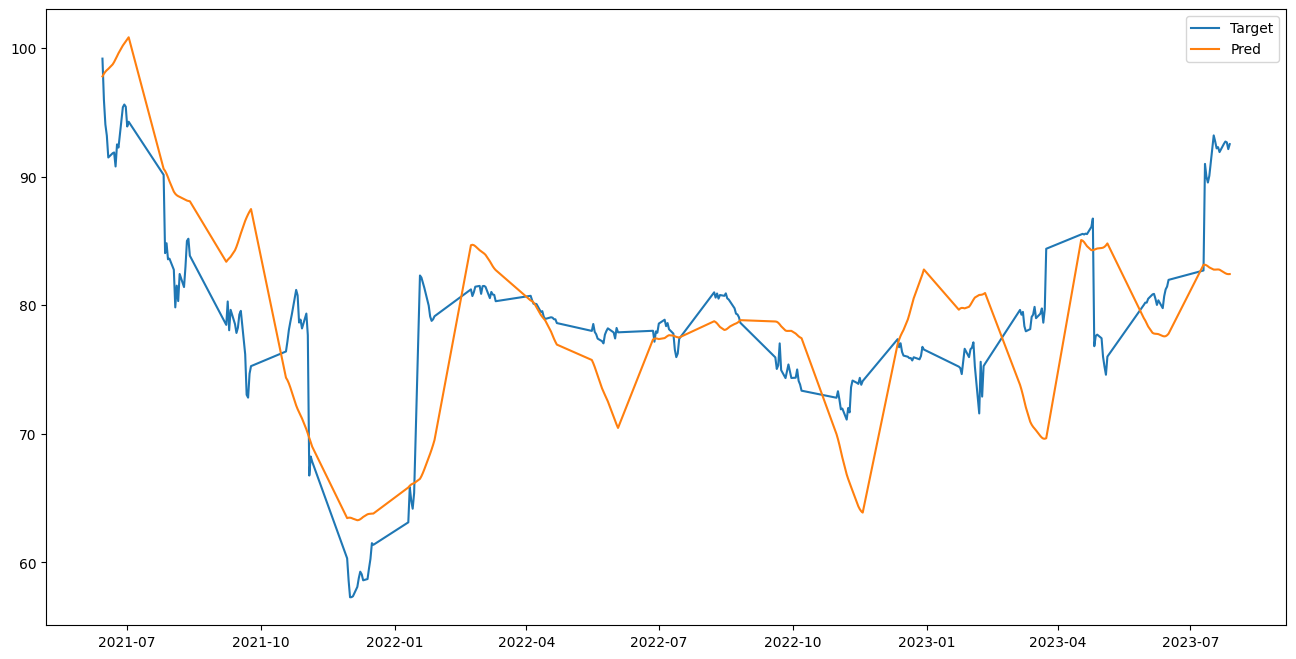

In [233]:
plt.figure(figsize=(16,8))
plt.plot(df_cv['ds'], df_cv['y'])
plt.plot(df_cv['ds'], df_cv['yhat'])
plt.legend(['Target', 'Pred'])

In [234]:
print(get_rmse(df_cv['y'], df_cv['yhat']))
print(get_mape(df_cv['y'], df_cv['yhat']))
print(get_mae(df_cv['y'], df_cv['yhat']))

5.866720407041058
0.06111412707804563
4.795791570414846
